In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from ast import literal_eval
import json

#df= pd.read_csv('GOLDEN_Tot_ZeroBias_UL2017_DataFrame_chargeInner_PXLayer_1_halfevent.csv')
#df= pd.read_csv('ZeroBias_2018D_DataFrame_1D_chargeInner_PXLayer_4.csv')
#df=pd.read_csv('TOTZeroBias_2018_DataFrame_1D_chargeInner_PXLayer_4.csv')
df=pd.read_csv('TOTZeroBias_2018_DataFrame_1D_chargeInner_PXLayer_1.csv')
#df=pd.read_csv('TOTZeroBias_2018_DataFrame_1D_size_PXLayer_3.csv')
#df=pd.read_csv('TOTZeroBias_2018_DataFrame_1D_size_PXLayer_1.csv')

df['histo']=df['histo'].apply(literal_eval)

df.set_index(['fromrun','fromlumi'], inplace=True, drop=False)
df.sort_index(inplace=True)
#print(df.columns)
#
#df['labels']=0
print(df.tail())
#print(df['entries']==0)

                  Unnamed: 0  fromrun  fromlumi                  hname  \
fromrun fromlumi                                                         
325175  25            157910   325175        25  chargeInner_PXLayer_1   
        26            157911   325175        26  chargeInner_PXLayer_1   
        27            157912   325175        27  chargeInner_PXLayer_1   
        28            155812   325175        28  chargeInner_PXLayer_1   
        29            155813   325175        29  chargeInner_PXLayer_1   

                  entries     Xmax  Xmin  Xbins  \
fromrun fromlumi                                  
325175  25              0  80000.0   0.0    100   
        26              0  80000.0   0.0    100   
        27              0  80000.0   0.0    100   
        28              0  80000.0   0.0    100   
        29              0  80000.0   0.0    100   

                                                              histo  
fromrun fromlumi                                     

(100,)


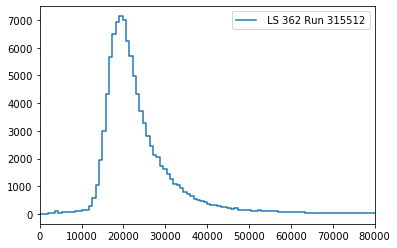

In [25]:
def PlotHist(df,run,ls):

    Xmax=80000.0 #30.0 #80000.0
    Xmin=0.0
    Xbins=100 #30 #100
    hname="size_PXLayer_1"
    
    #global df
    
    ahisto=df['histo'][run][ls]
    print(np.shape(ahisto))
    x= np.linspace(Xmin,Xmax,Xbins)
    plt.xlim(Xmin,Xmax)
    
    plt.step(x, ahisto, where='mid', label=(" LS " + str(df.fromlumi[run][ls]) + " Run " + str(df.fromrun[run][ls]) ))
    plt.legend()
    
#PlotHist(297050,15)
PlotHist(df,315512,362)
#PlotHist(df,306460,62)
#PlotHist(306459,1880)

In [2]:
import json

def checkLS(run,ls):
    isok=False
    global jsondata
    
    if str(run) in jsondata.keys():
        for i in jsondata[str(run)]:
           # print("i[0]",i[0])
           # print("i[1]",i[1])
            if (ls>=i[0] and ls <=i[1]):
                isok=True
                return isok
        return isok

#load the golden json file
jsondata={}
with open('Golden18.json') as json_file:
    jsondata = json.load(json_file)

df['labels']=False #initialize to false

for run in df['fromrun'].unique():
    for ls in df['fromlumi'][run]:
        df['labels'][run][ls]=checkLS(run,ls)
#print(df[df['labels']==True]) #to check against the Golden JSON

86439.97202504506
34422.7089058113
(234138,)
2060150


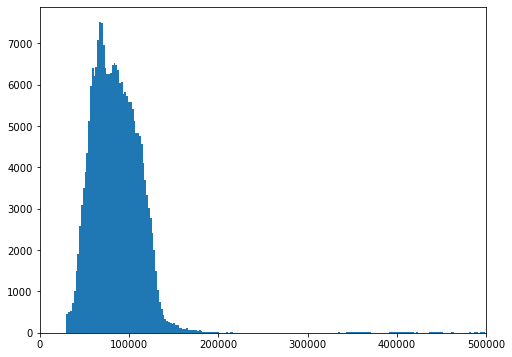

In [3]:
#def PlotHist(run,ls):

#Xmax=500000
#Xmin=0.0
#Xbins=250442
#hname="size_PXLayer_3"
    
global df
array=df.loc[df['entries']>=30000]
#print(array)
ahisto=array['entries'].values
#print(ahisto)
print(np.mean(ahisto))
print(np.std(ahisto))
print(np.shape(ahisto))
print(ahisto.max())
#x= np.linspace(Xmin,Xmax,Xbins)
#print(x.shape)
fig, ax = plt.subplots(figsize=[8,6])
ax.hist(ahisto,1000)
#plt.step(x, ahisto, where='mid', label=(" LS ") )
plt.xlim(0,500000)
plt.show()
#plt.legend()
#plt.savefig("histo_entries_size_PXLayer_3_all.png")

In [4]:
print(df.shape)
dfhighstat=df.loc[df['entries']>0]
print(dfhighstat.shape)
#PlotHist(dfhighstat,315512,362)

(250442, 10)
(239543, 10)


In [5]:
import keras
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF

data_std=np.array(dfhighstat['histo'][dfhighstat['labels']==True].values)
data_std = np.stack(data_std, axis=0)
print(data_std.shape)  
shortrange=True
if(shortrange):
        #indexdl=np.array([0,1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29])
        #indexdl=np.array([0,19,20,21,22,23,24,25,26,27,28,29])
        #indexdl=np.array([0,1,2,3,4,5,6,7,8,9,10,11,36,37,38,39,40,41,42,43,44,45,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,77,89,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99])
        #indexdl=np.array([71,72,73,74,75,76,77,78,77,89,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99])
        indexdl=np.array([61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,77,89,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99])
        data_std=np.delete(data_std, indexdl, axis=1)
print(data_std.shape)        
split =158964 # 47509 #62265 #110381 #113551 #112472
data_std_train,data_std_valid = data_std[:split,:],data_std[split:,:]
print(data_std_train.shape)
print(data_std_valid.shape)
#print(data_std_train[113180])
#print(data_std_valid[113180])

data_std_train=normalize(data_std_train, norm='l1', axis=1)

model= NMF(n_components=5, verbose=True)

H=model.fit_transform(data_std_train)
W=model.components_

Using TensorFlow backend.


(227092, 100)
(227092, 62)
(158964, 62)
(68128, 62)
violation: 1.0
violation: 0.7621314732474774
violation: 0.8772600495335471
violation: 0.4332488925448114
violation: 0.28256268044384397
violation: 0.20606322004548774
violation: 0.16104636891123905
violation: 0.1303056132538419
violation: 0.10908208201561867
violation: 0.09275969905477623
violation: 0.07960557427910817
violation: 0.0688014028543443
violation: 0.060316282488224675
violation: 0.053699349084927475
violation: 0.048387254422709726
violation: 0.04413357425106699
violation: 0.04070428614387467
violation: 0.037888585206484277
violation: 0.03567570531049687
violation: 0.03378775954805253
violation: 0.03211649126668085
violation: 0.030642395549552774
violation: 0.029303732875523264
violation: 0.028062360684519894
violation: 0.026931604658358223
violation: 0.025906135387999095
violation: 0.024940315601462332
violation: 0.02404051945586543
violation: 0.023224352126973456
violation: 0.02246962102567438
violation: 0.021819796239471

(158964, 5)
(158964, 62)


W0125 12:54:44.061942 139999220619072 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0125 12:54:44.063862 139999220619072 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0125 12:54:44.065428 139999220619072 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0125 12:54:44.094194 139999220619072 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython

(158964,)


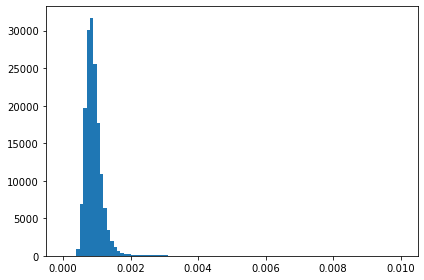

In [6]:
#H_std_cut=H_av_train[:66339,:]
#H_std_cut=H_std[92149:,:]
#print(H_std_cut.shape)
import math

from keras import backend as K
import tensorflow as tf

def mseTop10(y_true, y_pred):
    top_values, _ = tf.nn.top_k(K.square(y_pred - y_true), k=10, sorted=True)
    mean=K.mean(top_values, axis=-1)
    return K.sqrt(mean)
def MSE_dist(data_std_train,W,H, suffix):
    tot=np.zeros(data_std_train.shape)
    tot=np.matmul(H,W)
    print(tot.shape)
    MSEs=K.eval(mseTop10(tot,data_std_train))
    print(MSEs.shape)
    xbins=len(MSEs)
    x= np.linspace(0,0.3,xbins)
    #plt.xlim(0,0.3)
    n_bins=100
    #plt.step(x, MSEs, where='mid', label=("MSE"))
    fig, ax = plt.subplots(tight_layout=True)
    ax.hist(MSEs,bins=n_bins, range=(0,0.01))
    #plt.savefig("TOT_golden_ZeroBias_2018D_DataFrame_1_chargeInner_PXLayer_4_msedistribution_3comp"+suffix+".png")
    #plt.show()
H_cut=H[:,:5]
print(H_cut.shape)
W_cut=W[:5,:]    
MSE_dist(data_std_train,W,H,"std")

In [7]:
data_std_valid=normalize(data_std_valid, norm='l1', axis=1)
print(data_std_valid.shape)
H_valid=model.transform(data_std_valid)
#W_nojson,H_nojson=NMF_model(data_nojson,6)
#print(W_nojson[0].sum())
#print(W_nojson.shape)
print(len(H_valid))
print(H_valid.shape)

(68128, 62)
violation: 1.0
violation: 0.14246189117346636
violation: 0.0371438957222731
violation: 0.0156558534763564
violation: 0.011689240109684118
violation: 0.01038424239155177
violation: 0.009223352724371824
violation: 0.007912071483376493
violation: 0.006665693683482531
violation: 0.005564003315955888
violation: 0.004622009081485761
violation: 0.0038297088702614803
violation: 0.003168937347343473
violation: 0.002620321559360411
violation: 0.0021659378103302267
violation: 0.0017901318702939937
violation: 0.001479608094251117
violation: 0.0012232588910914342
violation: 0.0010118252878069322
violation: 0.0008376502984200104
violation: 0.0006943655210519539
violation: 0.0005766694539388732
violation: 0.00048013776863243916
violation: 0.0004010801330967547
violation: 0.0003363972500547327
violation: 0.00028350335002752606
violation: 0.0002402400538350626
violation: 0.00020485088777865402
violation: 0.00017587691515599132
violation: 0.00015213525170281158
violation: 0.00013265996868703

(158964, 5)
(68128, 62)
(68128,)


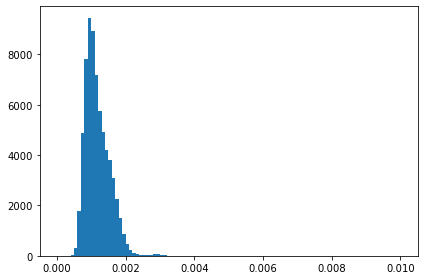

In [8]:
H_valid_cut=H_valid[:,:5]
W_cut=W[:5,:]    
print(H_cut.shape)
MSE_dist(data_std_valid,W,H_valid,"valid")

In [9]:
data_nojson=np.array(dfhighstat['histo'][dfhighstat['labels']==False].values)
data_nojson = np.stack(data_nojson, axis=0)
shortrange=True
if(shortrange):
        #indexdl=np.array([0,1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29])
        #indexdl=np.array([0,19,20,21,22,23,24,25,26,27,28,29,30])
        #indexdl=np.array([71,72,73,74,75,76,77,78,77,89,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99])
        indexdl=np.array([61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,77,89,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99])
        #indexdl=np.array([0,1,2,3,4,5,6,7,8,9,10,11,36,37,38,39,40,41,42,43,44,45,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,77,89,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99])
        data_nojson=np.delete(data_nojson, indexdl, axis=1)
data_nojson=normalize(data_nojson, norm='l1', axis=1)
H_nojson=model.transform(data_nojson)
#W_nojson,H_nojson=NMF_model(data_nojson,6)
#print(W_nojson[0].sum())
#print(W_nojson.shape)
print(len(H_nojson))
print(H_nojson.shape)
print(data_nojson.shape)

violation: 1.0
violation: 0.07808812360562069
violation: 0.02385163411905544
violation: 0.012655818582826594
violation: 0.009532598023753785
violation: 0.00785611060991623
violation: 0.006573306943429197
violation: 0.0055141006068399855
violation: 0.0046338791622328405
violation: 0.003909993894464262
violation: 0.0033152465604997963
violation: 0.002830335188170585
violation: 0.0024279518487693337
violation: 0.0020987606464671314
violation: 0.0018254714699760023
violation: 0.0015984029038038636
violation: 0.0014109602868730938
violation: 0.0012545018650255634
violation: 0.0011238451227069647
violation: 0.001014503608254479
violation: 0.0009228079280043218
violation: 0.0008457613292218438
violation: 0.0007809899270620539
violation: 0.0007258786233807351
violation: 0.0006795783330049047
violation: 0.0006398635539595978
violation: 0.0006044999334315215
violation: 0.0005733023505919467
violation: 0.0005478306381384375
violation: 0.0005258810884228596
violation: 0.0005067002427709388
violati

(158964, 5)
(12451, 62)
(12451,)


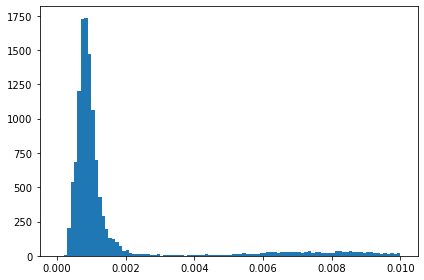

In [10]:
H_nojson_cut=H_nojson[:,:4]
W_cut=W[:4,:]    
print(H_cut.shape)
MSE_dist(data_nojson,W,H_nojson,"nojson")

In [10]:
df_test1= pd.read_csv('GOLDEN_Tot_ZeroBias_UL2017_DataFrame_chargeInner_PXLayer_1.csv')
#df_test1=pd.read_csv('TOTZeroBias_2018_DataFrame_1D_chargeInner_PXLayer_4.csv')
df_test1['histo']=df_test1['histo'].apply(literal_eval)

df_test1.set_index(['fromrun','fromlumi'], inplace=True, drop=False)
df_test1.sort_index(inplace=True)
#print(df.columns)
#
#df_test1['labels']=0
print(df_test1.shape)

(202289, 6)


In [50]:
dfhighstat_test1=df_test1.loc[df_test1['entries']>0]
#dfhighstat_test1 = dfhighstat_test1.sample(frac = 1)

In [51]:
data_test1=np.array(dfhighstat_test1['histo'])
data_test1 = np.stack(data_test1, axis=0)
indexdl=np.array([71,72,73,74,75,76,77,78,77,89,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99])
#indexdl=np.array([0,1,2,3,4,5,6,7,8,9,10,11,36,37,38,39,40,41,42,43,44,45,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,77,89,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99])
data_test1=np.delete(data_test1, indexdl, axis=1)
#data_test=data_test[:202280,:]
print(data_test1.shape)
data_test1=normalize(data_test1, norm='l1', axis=1)
H_test1=model.transform(data_test1)

(202289, 72)
violation: 1.0
violation: 0.2120958894399278
violation: 0.09572422770618882
violation: 0.05114956000731512
violation: 0.03010716890278329
violation: 0.018687978582101198
violation: 0.012100001737345668
violation: 0.008171025556174896
violation: 0.005723943321331328
violation: 0.0041643087382447815
violation: 0.0031561096675575308
violation: 0.0024934841784060766
violation: 0.0020487705961171453
violation: 0.001741126638810187
violation: 0.0015196912457493194
violation: 0.0013530319917042192
violation: 0.0012220336423332627
violation: 0.0011150897545815078
violation: 0.001024749868044625
violation: 0.0009463930961821547
violation: 0.0008769098497574196
violation: 0.000814147884404131
violation: 0.0007566625990217933
violation: 0.0007035485964740361
violation: 0.0006543597608846467
violation: 0.0006086160572772353
violation: 0.0005661413721450208
violation: 0.0005266440041616355
violation: 0.0004901321197064094
violation: 0.0004562993363805074
violation: 0.000425023054961131

(202289, 72)
(202289,)


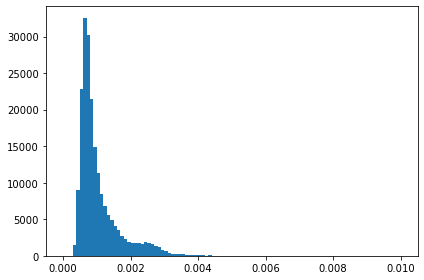

In [52]:
MSE_dist(data_test1,W,H_test1,"test1")

In [12]:
import numpy as np
import scipy as stats
from scipy.spatial import distance
H_cut=H[:12451,:]     #47500
H_valid_cut=H_valid[:12451,:]
H_nojson_cut=H_nojson[:12451,:]
#H_test1_cut=H_test1[:12451,:]
#H_test1_cut=H_test1[:10000,:]
#print("before 1D ",H_train_cut)
H_valid_vec=np.asarray(H_valid_cut).reshape(-1)
H_train_vec=np.asarray(H_cut).reshape(-1)
H_nojson_vec=np.asarray(H_nojson).reshape(-1)
#H_test1_vec=np.asarray(H_test1_cut).reshape(-1)
#H_test1_vec=np.asarray(H_test1_cut).reshape(-1)
print("chebyshev")
print(distance.chebyshev(H_train_vec, H_valid_vec))
print(distance.chebyshev(H_train_vec, H_nojson_vec))
#print(distance.chebyshev(H_train_vec, H_test1_vec))
print("cityblock")
print(distance.cityblock(H_train_vec, H_valid_vec))
print(distance.cityblock(H_train_vec, H_nojson_vec))
#print(distance.cityblock(H_train_vec, H_test1_vec))
print("euclidean")
print(distance.euclidean(H_train_vec, H_valid_vec))
print(distance.euclidean(H_train_vec, H_nojson_vec))
#print(distance.euclidean(H_train_vec, H_test1_vec))
print("correlation")
print(distance.correlation(H_train_vec, H_valid_vec))
print(distance.correlation(H_train_vec, H_nojson_vec))
#print(distance.correlation(H_train_vec, H_test1_vec))
print("directed_hausdorff")
print(distance.directed_hausdorff(H_cut, H_valid_cut)[0])
print(distance.directed_hausdorff(H_cut, H_nojson)[0])
#print(distance.directed_hausdorff(H_cut, H_test1_cut)[0])

#print(np.mean(distance.cdist(H, H_valid, 'euclidean')))
#print(np.mean(distance.cdist(H, H_nojson, 'mahalanobis')))

chebyshev
0.34437690985422365
0.4060506053497094
cityblock
437.69772833272134
470.89192728527553
euclidean
2.2025085604130656
3.0974888726650374
correlation
0.6015954659316107
0.750608593830976
directed_hausdorff
0.3095778019625346
0.030929901329949792


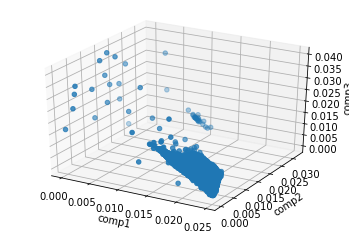

In [13]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(H[:,0],H[:,1],H[:,2])
ax.set_xlabel('comp1')
ax.set_ylabel('comp2')
ax.set_zlabel('comp3')
plt.show()

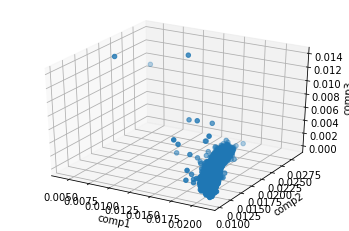

In [14]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(H_valid[:,0],H_valid[:,1],H_valid[:,2])
ax.set_xlabel('comp1')
ax.set_ylabel('comp2')
ax.set_zlabel('comp3')
plt.show()

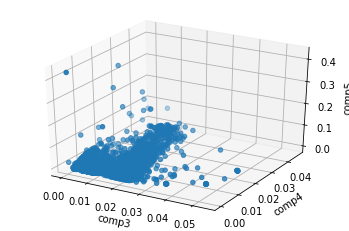

In [15]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(H_nojson[:,1],H_nojson[:,2],H_nojson[:,3])
#ax.scatter(H_nojson[:,1],H_nojson[:,2])
ax.set_xlabel('comp3')
ax.set_ylabel('comp4')
ax.set_zlabel('comp5')
plt.show()

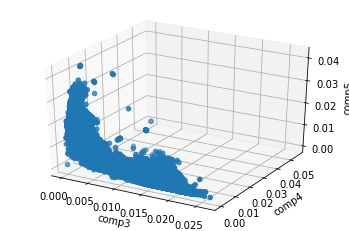

In [54]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(H_test1[:,1],H_test1[:,2],H_test1[:,3])
#ax.scatter(H_nojson[:,1],H_nojson[:,2])
ax.set_xlabel('comp3')
ax.set_ylabel('comp4')
ax.set_zlabel('comp5')
plt.show()

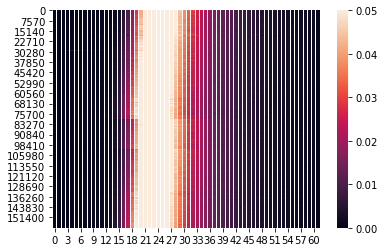

In [16]:
import seaborn as sns
sns.heatmap(data_std_train, vmin=0, vmax=0.05)
#sns.heatmap(data_std_train)

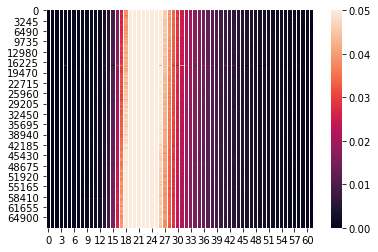

In [17]:
sns.heatmap(data_std_valid, vmin=0, vmax=0.05)

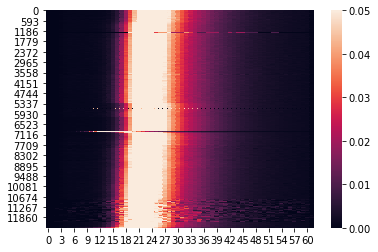

In [18]:
sns.heatmap(data_nojson, vmin=0, vmax=0.05)

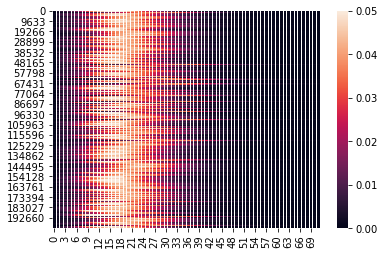

In [55]:
sns.heatmap(data_test1, vmin=0, vmax=0.05)

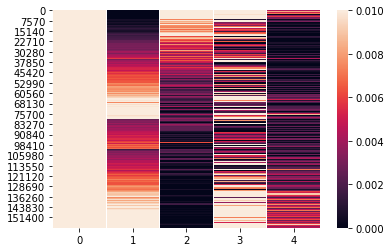

In [20]:
import seaborn as sns
#sns.heatmap(H,annot=True, fmt="f")
sns.heatmap(H,vmin=0, vmax=0.01)

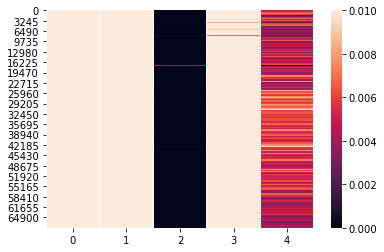

In [24]:
sns.heatmap(H_valid,vmin=0, vmax=0.01)

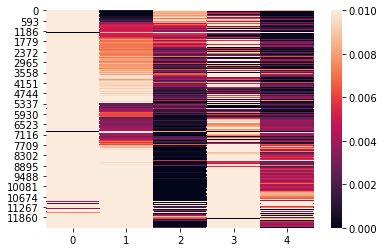

In [22]:
sns.heatmap(H_nojson,vmin=0, vmax=0.01)

In [23]:
sns.heatmap(H_test1,vmin=0, vmax=0.01)

NameError: name 'H_test1' is not defined

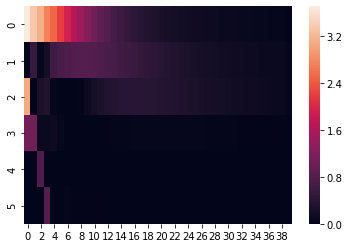

In [220]:
sns.heatmap(W)

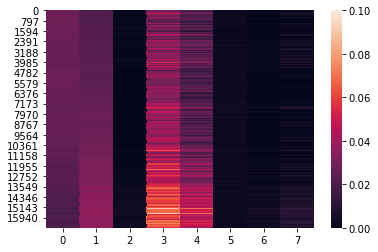

In [76]:
sns.heatmap(H_valid,vmin=0, vmax=0.1)

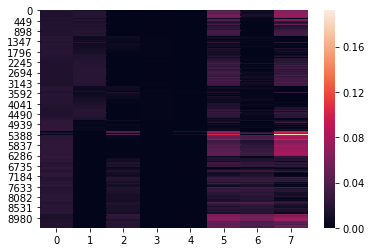

In [77]:
sns.heatmap(H_nojson)

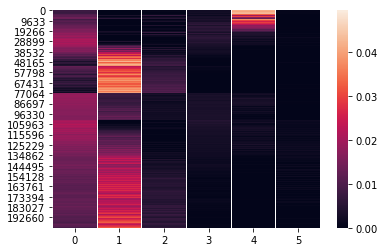

In [66]:
sns.heatmap(H_test)

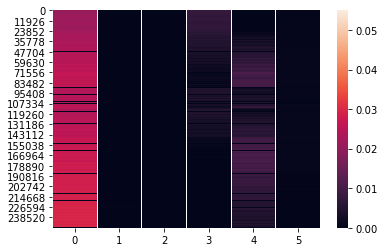

In [67]:
sns.heatmap(H_test1)